###  EWRI-WDSA Webinar : *Building the Next Generation of Storm Water Systems Using Python*

#### 🎯 objective 🎯
This webinar introduces PySWMM's ecosystem for modeling stormwater systems in Python. It also demonstrates how PySWMM enables
the integration of EPA-SWMM and Python's scientific stack, unlocking new analytical capabilities.

### about me

I am a data scientist at Xylem, I hold a Ph.D. in Civil Engineering with a specialization in Intelligent Infrastructure Systems
from the University of Michigan, Ann Arbor.

Visit [randomstorms.net](https://randomstorms.net) for more information on my work.

#### research interests

My research focuses lies at the intersection of electrical engineering and civil engineering. I use methodologies such as
machine learning, optimization, and wireless sensor networks to build cyber-physical water infrastructure.

Specific interests include:

* **Time Series Prediction and Anomaly Detection**: Enabling operational decision-making in water infrastructure through
predictive analytics.
* **Real-Time Control of Water Infrastructure**: Optimizing water system performance through real-time monitoring and control.
* **Wireless Sensor Networks for Environmental Monitoring**: Developing scalable solutions for environmental monitoring.

### table of contents 

1. getting_started: simulating stormwater systems in pyswmm
2. what makes pyswmm special?
3. pyswmm eco-system overview
4. real-time control: pystorms
5. water quality modeling: stormreactor
6. i/o: swmmio and swmm-pandas
7. 🧙🏼‍♂️ optimization
8. intresting research

### getting started

install packages for google colab

In [ ]:
pip install pyswmm pandas matplotlib pystorms

#### introduction: what is pyswmm?

[pyswmm](https://www.pyswmm.org): Pyswmm is a Python interface to the EPA-SWMM simulation engine, offering
an array of functionalities for stormwater management and research applications:

- Through pyswmm, users can not only run simulations but also dynamically interact with them by querying parameters, managing
simulation steps, and updating key attributes such as pump settings or valve configurations. This enables realistic control
over stormwater systems during simulation runs.

- Additionally, the integration of data-driven predictors like neural networks is facilitated via pyswmm's ability to inject
flows into simulations seamlessly.

- Pyswmm also fosters a modular approach to modeling; users can construct models that leverage Python for water quality
simulations while employing EPA-SWMM for hydraulic routing within the network infrastructure.

##### credits:
For comprehensive details regarding pyswmm's development team and its community of contributors, please explore the [credits
page](https://www.pyswmm.org/who).

#### level 0: simulating stormwater systems in pyswmm

In [2]:
# import libs 📚
import pyswmm
import pystorms
import matplotlib.pyplot as plt

# RC parms for pretty plots 💁🏽
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn-v0_8-whitegrid')

pystorms is a collection of stormwater networks for anlyzing the performance of stormwater networks. We will use the stormwater networks in pystorms in this tutorial.

In [6]:
network = pystorms.networks.load_network("theta")

In [7]:
print(network)

/Users/amullap/Archive/dev/digi-swmm/venv/lib/python3.11/site-packages/pystorms/networks/theta.inp


👆🏼 pystorms is just providing a path to the stormwater network. We will talk more about pystorm in the later in the webinar

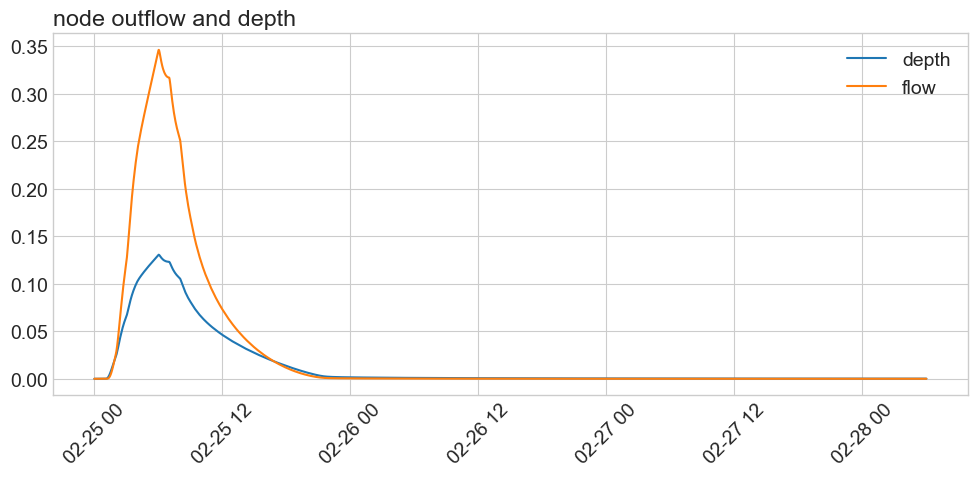

In [9]:
time = []
flow = []
depth = []

with pyswmm.Simulation(network) as sim:
    link = pyswmm.Links(sim)['7']
    node = pyswmm.Nodes(sim)['P1']
    
    for step in sim:
        time.append(sim.current_time)
        depth.append(node.depth)
        flow.append(link.flow)

fig = plt.figure(figsize=(10, 5), tight_layout=True)
ax = fig.gca()
ax.plot(time, depth, label='depth')
ax.plot(time, flow, label='flow')
ax.set_title("node outflow and depth", loc='left')
ax.tick_params(axis='x', labelrotation=45)
ax.legend()

#### level 1: controlling stormwater infrastructure

Pyswmm enables the dynamic modification of the stormwater network in real-time during simulations. This functionality has played a pivotal role in advancing the development and implementation of innovative stormwater control algorithms.

In [10]:
# Load the input file
input_file = pystorms.networks.load_network("theta")

depth = []
flow = []
simulation_time = []
with pyswmm.Simulation(inputfile=input_file) as sim:
    # Initialize nodes and links objects
    nodes = pyswmm.Nodes(sim)
    link = pyswmm.Links(sim)
    
    # Specify the link or nodes that we are interested in monitoring
    node_P1 = nodes['P1']
    link_8 = link['8']
    orifice_P1 = link['1']
    # Progress through the simulation
    for step in sim:
        # Log the simulation time
        simulation_time.append(sim.current_time)
        
        basin_P1_depth = node_P1.depth
        
        # A simple control action to hold the water in the basin
        if basin_P1_depth <= 0.10:
            orifice_P1.target_setting = 0.0
        else:
            orifice_P1.target_setting = 1.0
        
        # Log basin depth and flow
        depth.append(basin_P1_depth)
        flow.append(link_8.flow)

Text(0.5, 0, 'Simulation Time')

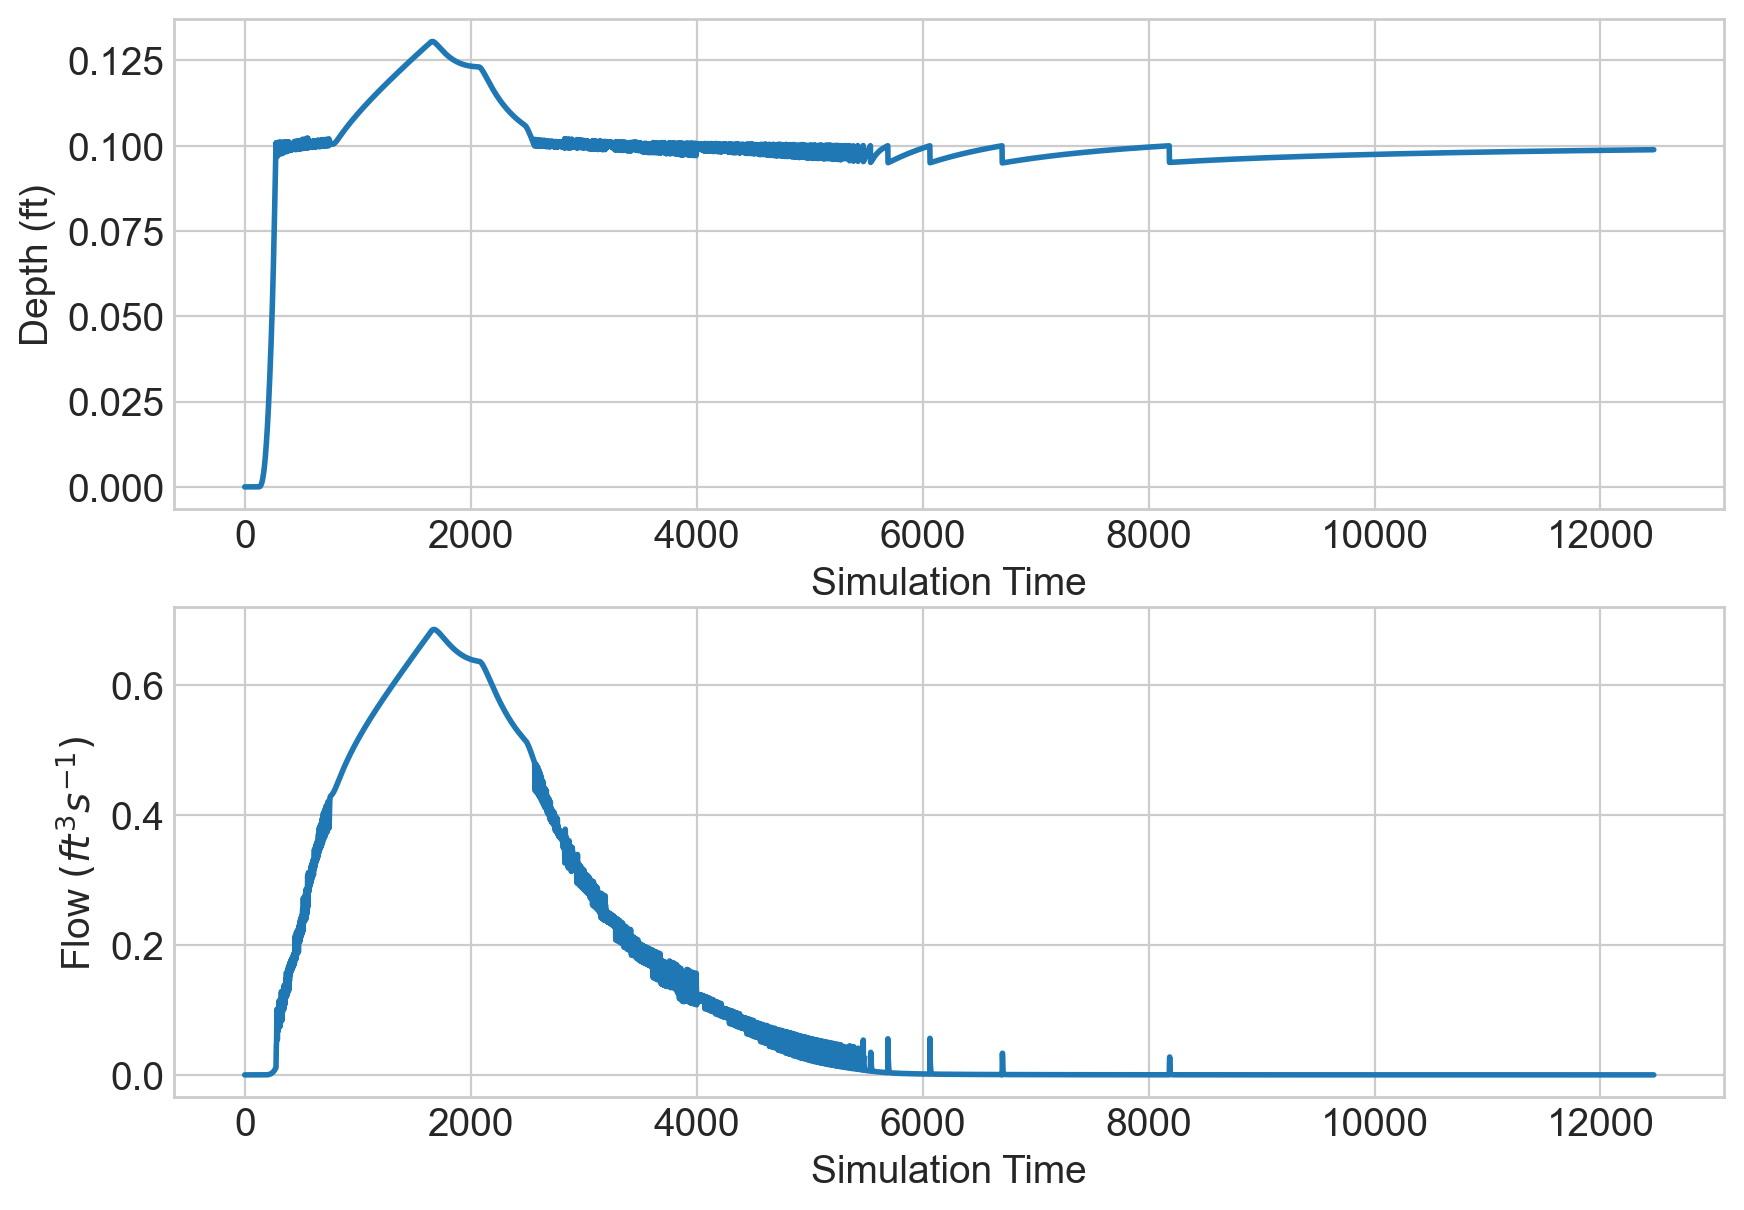

In [15]:
plt.figure(figsize=(10, 7), dpi=200)
plt.subplot(2, 1, 1)
plt.plot(depth, linewidth=2.0)
plt.ylabel("Depth (ft)")
plt.xlabel("Simulation Time")

plt.subplot(2, 1, 2)
plt.plot(flow, linewidth=2.0)
plt.ylabel(r"Flow $(ft^{3}s^{-1})$")
plt.xlabel("Simulation Time")

pyswmm has a lot of other amazing features! please refer to pyswmm tutorials https://www.pyswmm.org/tutorial and docs to learn 